In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("news.csv")

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.shape

(6335, 4)

In [5]:
## Split data into train and test 
x_train,x_test,y_train,y_test=train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

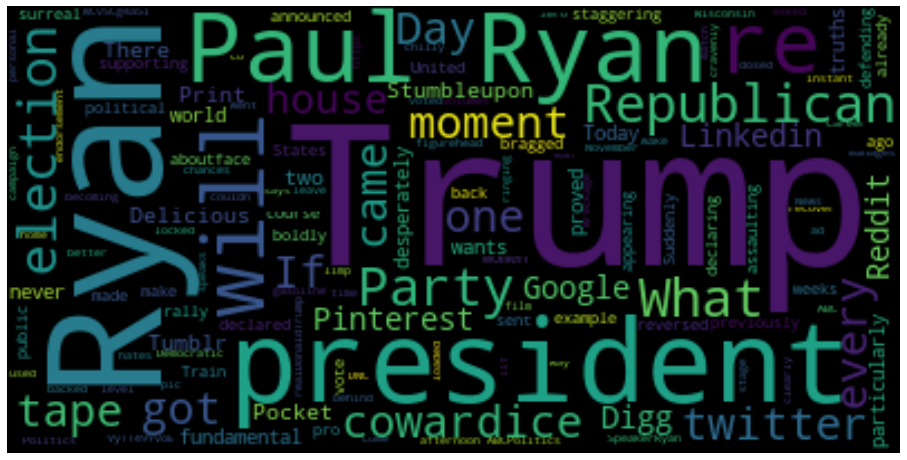

In [11]:
text = x_train[1]
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
## Convert the raw text into a matrix of TF-IDF features + remove stop words 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf  =tfidf_vectorizer.transform(x_test)

In [7]:
## The learned vocabulary (feautures)
tfidf_vectorizer.vocabulary_

{'donald': 17037,
 'trump': 55902,
 'received': 44697,
 'key': 30414,
 'endorsement': 18744,
 'immigration': 27192,
 'platform': 41513,
 'sen': 48710,
 'jeff': 29397,
 'sessions': 48889,
 'strongest': 52337,
 'proponents': 43055,
 'congress': 12501,
 'restricting': 45993,
 'nina': 37651,
 'november': 38054,
 '2016': 710,
 '39': 1143,
 'pm': 41683,
 'polish': 41828,
 'government': 23788,
 'common': 12034,
 'people': 40627,
 'liberal': 32123,
 'leftist': 31802,
 'opposition': 38901,
 'lost': 32805,
 'year': 60450,
 'election': 18242,
 'pray': 42299,
 'president': 42557,
 'usa': 57561,
 'dubi': 17516,
 '25': 863,
 'bitches': 7367,
 'like': 32264,
 'hillary': 25818,
 'fan': 20411,
 'america': 3699,
 'wins': 59767,
 'lucky': 32951,
 'wasn': 58986,
 'cop': 13008,
 'patience': 40276,
 'job': 29605,
 'don': 17034,
 'watch': 59006,
 'video': 58251,
 'obnoxious': 38376,
 'hater': 25123,
 'getting': 23154,
 'justice': 29927,
 'explodes': 19966,
 'million': 35257,
 'views': 58288,
 'gone': 23658,


In [29]:
## Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=80)
pac.fit(x_train_tfidf,y_train)


## Predict on the test set and calculate accuracy
y_pred = pac.predict(x_test_tfidf)
accuracy = accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(accuracy*100,2)}%')

Accuracy: 93.69%


In [48]:
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[588  40]
 [ 40 599]]
